# __Code Challenge__

In [6]:
import pandas as pd
import numpy as np
from string import punctuation
from textdistance import levenshtein

### __Read Files__

In [7]:
example_abp_data = pd.read_csv('C://Users/Admin/Identeqchallenge/example_abp_data.csv')
example_abp_data.head()

,SINGLE_LINE_ADDRESS,POSTCODE,STREET_NAME
0,"PACEC, SECOND FLOOR, 49-53 REGENT STREET, CAMB...",CB2 1AB,REGENT STREET
1,"FIRST FLOOR, 47-53 REGENT STREET, CAMBRIDGE, C...",CB2 1AB,REGENT STREET
2,"BUBBLE LTD, SUITE 1, RAVENSCROFT HOUSE, 59-61 ...",CB2 1AB,REGENT STREET
3,"EDE & RAVENSCROFT, SUITE 2, RAVENSCROFT HOUSE,...",CB2 1AB,REGENT STREET
4,"CAMBRIDGE NUTRACEUTICALS LTD, SUITE 3, RAVENSC...",CB2 1AB,REGENT STREET


In [8]:
df = pd.read_csv('C://Users/Admin/Identeqchallenge/example_input_data.csv')
df.head()

,Address_Line_1,Address_Line_2,Address_Line_3,Address_Line_4,Address_Line_5,Postcode
0,UNIT 3,39-41 MOORBRIDGE ROAD,MAIDENHEAD,BERKSHIRE,NaN,SL6 8LT
1,4 WORKSHOP,PERCY ROAD,DARLINGTON,NaN,NaN,DL3 0RX
2,SAXON HOUSE,HENSON WAY,TELFORD WAY INDUSTRIAL ESTATE,KETTERING,NN16 8PX,NN16 8PX
3,1 QUARRY ROAD,NORTHAMPTON,NN5 6NT,NaN,NaN,NN5 6NT
4,METER R/O UNIT 54 UNKNOWN SUPPLY,DALTON PARK,MURTON,SEAHAM,NaN,SR7 9HU


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Address_Line_1  100 non-null    object
 1   Address_Line_2  90 non-null     object
 2   Address_Line_3  83 non-null     object
 3   Address_Line_4  45 non-null     object
 4   Address_Line_5  14 non-null     object
 5   Postcode        100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [10]:
# Check memory to optimise for large datasets
df.memory_usage(deep=True)
# Can change data type from object to category when att cardinality is low

Index              128
Address_Line_1    7290
Address_Line_2    6584
Address_Line_3    6179
Address_Line_4    4739
Address_Line_5    3654
Postcode          6452
dtype: int64

## ___Preprocessing___

In [11]:
df = df.applymap(lambda s: s.upper() if type(s) == str else s) # make values upper case
df

,Address_Line_1,Address_Line_2,Address_Line_3,Address_Line_4,Address_Line_5,Postcode
0,UNIT 3,39-41 MOORBRIDGE ROAD,MAIDENHEAD,BERKSHIRE,NaN,SL6 8LT
1,4 WORKSHOP,PERCY ROAD,DARLINGTON,NaN,NaN,DL3 0RX
2,SAXON HOUSE,HENSON WAY,TELFORD WAY INDUSTRIAL ESTATE,KETTERING,NN16 8PX,NN16 8PX
3,1 QUARRY ROAD,NORTHAMPTON,NN5 6NT,NaN,NaN,NN5 6NT
4,METER R/O UNIT 54 UNKNOWN SUPPLY,DALTON PARK,MURTON,SEAHAM,NaN,SR7 9HU
...,...,...,...,...,...,...
95,LAND OFF PLOT 8,DRAIN BANK NORTH,COWBIT,SPALDING,NaN,PE12 6FR
96,UNITS 8A/8B,UNIT 2,RIVERSIDE RETAIL PARK,NORWICH,NaN,NR1 1WR
97,BINSTORE,BRUFF ROAD,IPSWICH,IP2 8EF,NaN,IP2 8EF
98,THE PHARMACY,RAVENSWORTH ROAD,GATESHEAD,NaN,NaN,NE11 9AZ


In [12]:
df = df.apply(lambda x: x.str.strip()) # strip string values

In [13]:
df = df.apply(lambda x: x.str.strip(punctuation)) # strip punctuation

In [14]:
df.fillna('', inplace=True)
df.head()

,Address_Line_1,Address_Line_2,Address_Line_3,Address_Line_4,Address_Line_5,Postcode
0,UNIT 3,39-41 MOORBRIDGE ROAD,MAIDENHEAD,BERKSHIRE,,SL6 8LT
1,4 WORKSHOP,PERCY ROAD,DARLINGTON,,,DL3 0RX
2,SAXON HOUSE,HENSON WAY,TELFORD WAY INDUSTRIAL ESTATE,KETTERING,NN16 8PX,NN16 8PX
3,1 QUARRY ROAD,NORTHAMPTON,NN5 6NT,,,NN5 6NT
4,METER R/O UNIT 54 UNKNOWN SUPPLY,DALTON PARK,MURTON,SEAHAM,,SR7 9HU


In [15]:
Postcode = df['Postcode']
df.pop('Postcode') # temporarily remove postcode to apply regex replace methods

df = df.replace(r'[A-Z]{1,2}[0-9R][0-9A-Z]? [0-9][A-Z]{2}', '', regex=True).astype('string') # remove redundant postcode in address line columns
df = df.replace(' RD', ' ROAD', regex=True).astype('string') # normalise street names

df['Single_Line_Address'] = df.apply(lambda x: ', '.join(x[x != '']), axis=1)

In [16]:
df.drop(['Address_Line_1', 'Address_Line_2', 'Address_Line_3', 'Address_Line_4', 'Address_Line_5'], axis=1, inplace=True) # remove extra columns
df.insert(1, 'Postcode', Postcode) # reinsert postcode

In [17]:
df.head()

,Single_Line_Address,Postcode
0,"UNIT 3, 39-41 MOORBRIDGE ROAD, MAIDENHEAD, BER...",SL6 8LT
1,"4 WORKSHOP, PERCY ROAD, DARLINGTON",DL3 0RX
2,"SAXON HOUSE, HENSON WAY, TELFORD WAY INDUSTRIA...",NN16 8PX
3,"1 QUARRY ROAD, NORTHAMPTON",NN5 6NT
4,"METER R/O UNIT 54 UNKNOWN SUPPLY, DALTON PARK,...",SR7 9HU


In [18]:
# Create dictionary with postcode as key and street names as values
from collections import defaultdict

post_street = defaultdict(list)

post_list = example_abp_data.POSTCODE.tolist()

street_list = example_abp_data.STREET_NAME.tolist()


for k, v in zip(post_list, street_list):
    if v not in post_street[k]:
        post_street[k].append(v)

print(post_street)

defaultdict(<class 'list'>, {'CB2 1AB': ['REGENT STREET'], 'CB22 4PS': ['MOORFIELD ROAD'], 'CM1 7FG': ['PUDDINGS WOOD DRIVE', 'WOODHOUSE LANE'], 'CM8 2AP': ['NEWLANDS PRECINCT', 'NEWLANDS DRIVE'], 'CM8 2DZ': ['COLLINGWOOD ROAD'], 'CO10 7UR': ['SCOSSELS'], 'CO15 4LP': ['TELFORD ROAD'], 'CO3 8PB': ['LONDON ROAD', 'CHURCH LANE'], 'CO6 1TU': ['CHURCH STREET'], 'DH4 5AL': ['SUNRISE LANE'], 'DL1 2PA': ['DODSWORTH STREET'], 'DL1 2PB': ['CLEVELAND TRADING ESTATE', 'FORGE WAY', 'PARK LANE', 'CLEVELAND STREET'], 'DL3 0RX': ['PERCY ROAD'], 'DL3 6LP': ['TEMPERANCE PLACE', 'FOUR RIGGS'], 'DN15 8RE': ['MERCIA WAY'], 'DN21 5QR': ['MIDDLE STREET'], 'DN9 3DW': ['CROFT ROAD', 'LOW DEEPS LANE', 'BRACKEN HILL LANE'], 'IG11 7BP': ['FRESH WHARF ROAD'], 'IG11 9RT': ['BLAKE AVENUE'], 'IP18 6DD': ['CAUTLEY ROAD'], 'IP2 8EF': ['CROFT STREET'], 'IP2 8HD': ['FELAW STREET'], 'IP28 6JH': ['THE STREET'], 'IP3 9BJ': ['FELIXSTOWE ROAD', 'HINES ROAD'], 'IP6 8NZ': ['MAITLAND ROAD', 'LION LANE'], 'IP8 3JD': ['OLD LONDON 

In [19]:
# Add expected street column
df['Expected_Street'] = df['Postcode'].map(post_street)
df.head()

,Single_Line_Address,Postcode,Expected_Street
0,"UNIT 3, 39-41 MOORBRIDGE ROAD, MAIDENHEAD, BER...",SL6 8LT,[]
1,"4 WORKSHOP, PERCY ROAD, DARLINGTON",DL3 0RX,[PERCY ROAD]
2,"SAXON HOUSE, HENSON WAY, TELFORD WAY INDUSTRIA...",NN16 8PX,"[HENSON WAY, VERNON COURT, RILEY ROAD, TELFORD..."
3,"1 QUARRY ROAD, NORTHAMPTON",NN5 6NT,[QUARRY ROAD]
4,"METER R/O UNIT 54 UNKNOWN SUPPLY, DALTON PARK,...",SR7 9HU,[nan]


In [20]:
# Options to expand dataframe
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

In [21]:
df['Street_In_Postcode'] = df.apply(lambda x: 'Yes' if any(str(street) in x.Single_Line_Address for street in x.Expected_Street) else 'No', axis=1) # apply lambda function for matching

# ___Results___

In [22]:
df.loc[df['Street_In_Postcode'] == 'Yes']

,Single_Line_Address,Postcode,Expected_Street,Street_In_Postcode
1,"4 WORKSHOP, PERCY ROAD, DARLINGTON",DL3 0RX,[PERCY ROAD],Yes
2,"SAXON HOUSE, HENSON WAY, TELFORD WAY INDUSTRIAL ESTATE, KETTERING",NN16 8PX,"[HENSON WAY, VERNON COURT, RILEY ROAD, TELFORD WAY, HENSON CLOSE]",Yes
3,"1 QUARRY ROAD, NORTHAMPTON",NN5 6NT,[QUARRY ROAD],Yes
5,"UNIT 17, MAITLAND ROAD, NEEDHAM MARKET, IPSWICH",IP6 8NZ,"[MAITLAND ROAD, LION LANE]",Yes
6,"NORTH MALTING THE MALTINGS, FELAW STREET, IPSWICH",IP2 8HD,[FELAW STREET],Yes
7,"19-21 REGENT STREET, CAMBRIDGE",CB2 1AB,[REGENT STREET],Yes
8,"UNIT 3 RIVERSIDE HOUSE, 24 LOWER SOUTHEND ROAD, WICKFORD",SS11 8AW,[LOWER SOUTHEND ROAD],Yes
9,"WORKSHOP JOHNS AUTOS, TEMPERANCE PLACE, DARLINGTON",DL3 6LP,"[TEMPERANCE PLACE, FOUR RIGGS]",Yes
10,"WEMBLEY GARDENS, CAMBOIS, BLYTH",NE24 1RZ,[WEMBLEY GARDENS],Yes
11,"SITE 4/5, COQUET ENTERPRISE PARK, AMBLE, MORPETH",NE65 0PE,"[COQUET ENTERPRISE PARK, GREENSFIELD INDUSTRIAL ESTATE, SOUTHMEAD]",Yes


In [23]:
df.loc[df['Street_In_Postcode'] == 'No']

,Single_Line_Address,Postcode,Expected_Street,Street_In_Postcode
0,"UNIT 3, 39-41 MOORBRIDGE ROAD, MAIDENHEAD, BERKSHIRE",SL6 8LT,[],No
4,"METER R/O UNIT 54 UNKNOWN SUPPLY, DALTON PARK, MURTON, SEAHAM",SR7 9HU,[nan],No
20,"TOILETS & PREMISES, PARK ROAD, ASHINGTON",NE63 9NF,"[nan, ARIEL STREET]",No
50,"DUNE, EAST FARM HOUSE, EMBLETON, ALNWICK",NE66 3XB,[nan],No
69,"11B MIDDLETON GRANGE, HARTLEPOOL",TS24 7RS,[nan],No
75,"RUSTON HOUSE, WATERSIDE SOUTH, LINCOLN",LN5 7FD,[PELHAM STREET],No
76,"HUNTERS ROAD, SPITAL TONGUES, NEWCASTLE UPON TYNE",NE2 4NE,[],No
77,"4/7 UNIT BT B, LYNMOUTH ROAD, NORTH SHIELDS",NE29 7TY,"[BARMOUTH ROAD, DARTMOUTH ROAD, PLYMOUTH ROAD, EXMOUTH ROAD, WEYMOUTH ROAD]",No
78,"MIDWEST BUSINESS PARK, WASHWAY ROAD, HOLBEACH, SPALDING",PE12 8JB,[HURN ROAD],No
79,"THE OLD CHAPEL, HEXTON, HITCHIN",SG5 3HX,"[PEGSDON WAY, HIGHAM ROAD, MILL LANE]",No


In [24]:
df['Street_In_Postcode'].value_counts()

Yes    70
No     30
Name: Street_In_Postcode, dtype: int64

<AxesSubplot:>

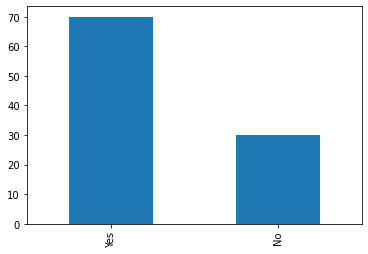

In [25]:
df['Street_In_Postcode'].value_counts().plot.bar()

In [26]:
# check for potential typos (levenshtein accounts for string length)
df['lev_dist'] = df.apply(lambda x: levenshtein.distance(
    x['Single_Line_Address'], x['Expected_Street']), axis=1)
df

,Single_Line_Address,Postcode,Expected_Street,Street_In_Postcode,lev_dist
0,"UNIT 3, 39-41 MOORBRIDGE ROAD, MAIDENHEAD, BERKSHIRE",SL6 8LT,[],No,52
1,"4 WORKSHOP, PERCY ROAD, DARLINGTON",DL3 0RX,[PERCY ROAD],Yes,34
2,"SAXON HOUSE, HENSON WAY, TELFORD WAY INDUSTRIAL ESTATE, KETTERING",NN16 8PX,"[HENSON WAY, VERNON COURT, RILEY ROAD, TELFORD WAY, HENSON CLOSE]",Yes,65
3,"1 QUARRY ROAD, NORTHAMPTON",NN5 6NT,[QUARRY ROAD],Yes,26
4,"METER R/O UNIT 54 UNKNOWN SUPPLY, DALTON PARK, MURTON, SEAHAM",SR7 9HU,[nan],No,61
5,"UNIT 17, MAITLAND ROAD, NEEDHAM MARKET, IPSWICH",IP6 8NZ,"[MAITLAND ROAD, LION LANE]",Yes,47
6,"NORTH MALTING THE MALTINGS, FELAW STREET, IPSWICH",IP2 8HD,[FELAW STREET],Yes,49
7,"19-21 REGENT STREET, CAMBRIDGE",CB2 1AB,[REGENT STREET],Yes,30
8,"UNIT 3 RIVERSIDE HOUSE, 24 LOWER SOUTHEND ROAD, WICKFORD",SS11 8AW,[LOWER SOUTHEND ROAD],Yes,56
9,"WORKSHOP JOHNS AUTOS, TEMPERANCE PLACE, DARLINGTON",DL3 6LP,"[TEMPERANCE PLACE, FOUR RIGGS]",Yes,50


In [27]:
df1 = df[["Single_Line_Address", "Postcode", "Street_In_Postcode"]]

In [29]:
df1.to_csv("C:/Users/Admin/Identeqchallenge/example_output_data.csv", sep=',', encoding='utf-8', index=False)